In [1]:
import quandl
import matplotlib.dates as mdates

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
#from mpl_finance import candlestickOhlc
import mplfinance as mpf


In [5]:
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [6]:
QUANDL_KEY = "Pre8o9Hi1HJmDysWh43i"

In [7]:
quandl.ApiConfig.api_key = QUANDL_KEY

In [8]:
df = quandl.get("EURONEXT/ABN")

In [9]:
df.tail(300)

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2019-02-05,21.100,21.450,21.010,21.380,2045433.0,43607137.82
2019-02-06,21.340,21.910,21.230,21.860,2788428.0,60413719.76
2019-02-07,21.860,22.060,21.480,21.480,3334995.0,72296309.91
2019-02-08,21.400,21.400,21.060,21.230,2829838.0,60066645.24
2019-02-11,21.440,21.680,21.360,21.590,2016762.0,43519861.95
...,...,...,...,...,...,...
2020-04-08,7.762,7.800,7.480,7.766,4760996.0,36392359.00
2020-04-09,7.984,8.214,7.720,7.950,5437956.0,43154202.00
2020-04-14,7.966,8.080,7.492,7.526,5256521.0,40624665.00


In [7]:
df = df.tail(300)
df

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2019-01-23,22.380,22.750,22.320,22.440,2087965.0,47032940.05
2019-01-24,22.520,22.540,22.050,22.250,2374489.0,52900265.18
2019-01-25,22.480,22.490,22.220,22.300,2235265.0,49916242.87
2019-01-28,22.290,22.330,21.990,22.110,1199039.0,26517806.94
2019-01-29,22.040,22.150,21.910,22.000,2292533.0,50516934.81
...,...,...,...,...,...,...
2020-03-26,8.400,8.608,8.250,8.534,5922506.0,49944267.00
2020-03-27,8.450,8.466,7.774,8.150,4296877.0,34910020.00
2020-03-30,7.500,7.750,7.260,7.340,7036208.0,52406782.00


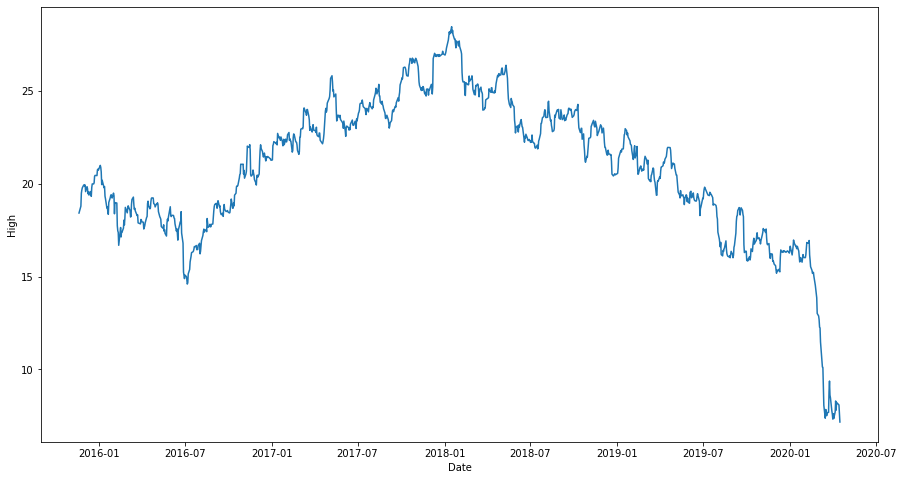

In [10]:
sns.lineplot(data = df,x = df.index, y = "High"  )

In [13]:
prices = df.Last
volumes = df.Volume


Date
2015-11-20    38392898.0
2015-11-23     3352514.0
2015-11-24     4871901.0
2015-11-25     4802607.0
2015-11-26     1648481.0
                 ...    
2020-04-08     4760996.0
2020-04-09     5437956.0
2020-04-14     5256521.0
2020-04-15     5816933.0
2020-04-16     5445696.0
Name: Volume, Length: 1116, dtype: float64

(0.0, 30000000)

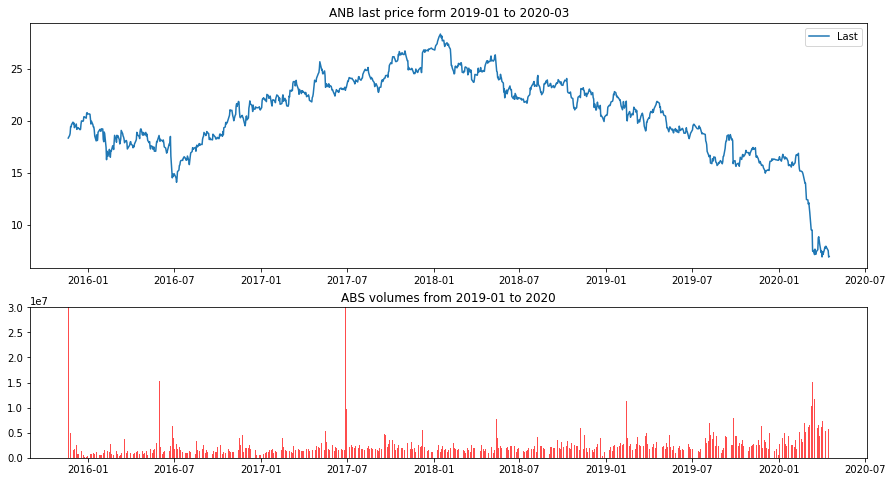

In [25]:
ax_prices = plt.subplot2grid((5,4),(0,0),rowspan = 3,colspan = 4)
ax_volumes = plt.subplot2grid((5,4),(3,0),colspan = 4,rowspan = 2)
ax_prices.plot(prices.index, prices,label = "Last")
ax_prices.set_title("ANB last price form 2019-01 to 2020-03")
ax_prices.legend()

plt.subplots_adjust(wspace = 0.5,hspace = 0.7)

ax_volumes.bar(volumes.index, volumes,color = 'red',alpha = 0.7)
#ax_volumes.plot(volumes.index, volumes,color = 'green',alpha = 0.8)

ax_volumes.set_title("ABS volumes from 2019-01 to 2020")
ax_volumes.set_ylim(top = 30000000)

In [37]:
df = quandl.get("EURONEXT/ABN",start_date = '2020-01-01', end_date = '2020-04-01')

In [38]:
df['Date'] = df.index.map(mdates.date2num)
df.head()

,Open,High,Low,Last,Volume,Turnover,Date
Date,,,,,,,
2020-01-02,16.350,16.640,16.320,16.555,2686481.0,44400594.0,737426.0
2020-01-03,16.505,16.505,16.265,16.325,2460206.0,40238363.0,737427.0
2020-01-06,16.170,16.170,15.830,16.130,2686243.0,43027880.0,737430.0
2020-01-07,16.245,16.410,16.205,16.325,2168005.0,35366926.0,737431.0
2020-01-08,16.260,16.615,16.220,16.550,2497561.0,41132616.0,737432.0


In [39]:
df_holc = df[["Date","High","Open","Low","Last",'Volume']]
df_holc.rename(columns={'Last':'Close'},inplace=True) 
df_holc.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,High,Open,Low,Close,Volume
Date,,,,,,
2020-01-02,737426.0,16.640,16.350,16.320,16.555,2686481.0
2020-01-03,737427.0,16.505,16.505,16.265,16.325,2460206.0
2020-01-06,737430.0,16.170,16.170,15.830,16.130,2686243.0
2020-01-07,737431.0,16.410,16.245,16.205,16.325,2168005.0
2020-01-08,737432.0,16.615,16.260,16.220,16.550,2497561.0


In [1]:
#fig, ax = plt.subplots(figsize = (8,4))
#formatter = mdates.DateFormatter('%Y-%m-%d')
#ax.xaxis.set_major_formatter(formatter)
#candlestick_ohlc(ax, df_holc.values, width = 0.8, colorup = 'red', colordown ='green')
#plt.show()

In [ ]:
'''style = [['blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']]'''

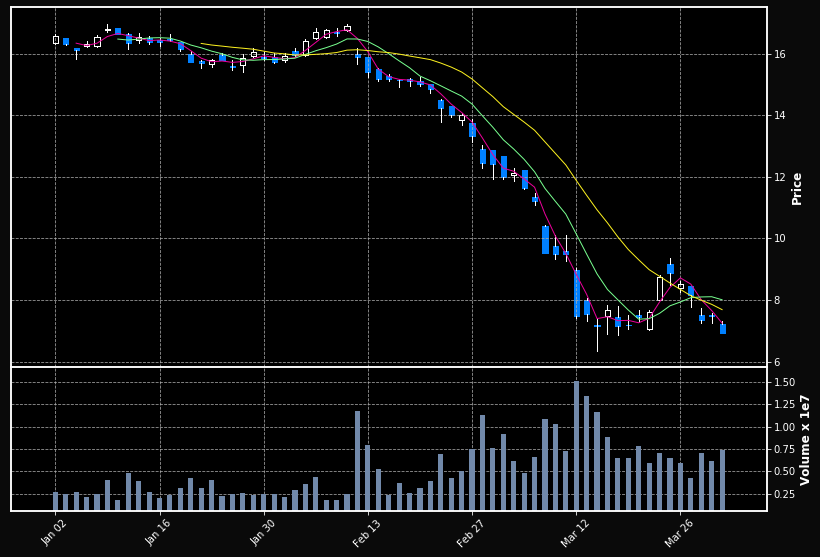

In [48]:
mpf.plot(df_holc,type='candle',style='mike',mav = (3,7,), volume = True, figratio=(15,10))

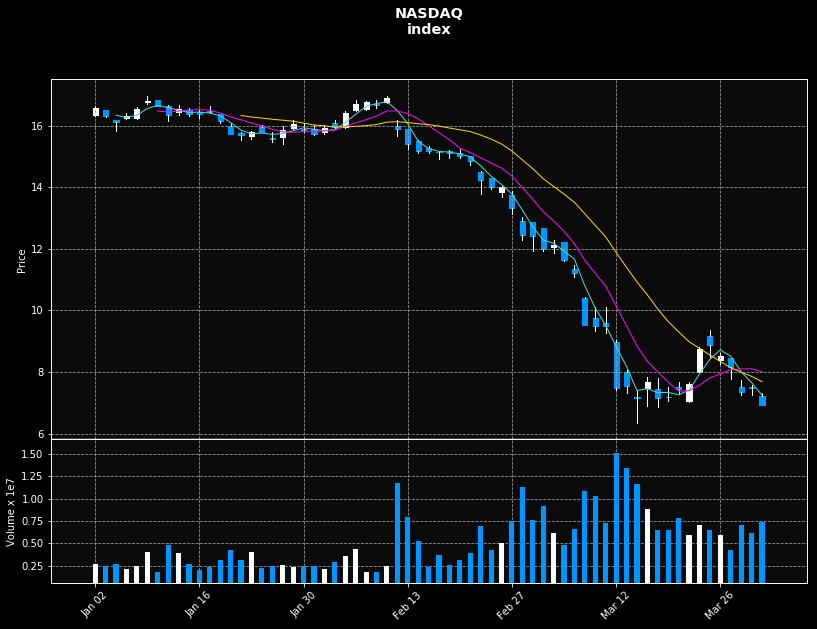

In [58]:
mpf.plot(df_holc,type='candle',style='nightclouds',mav = (3,7,15), volume = True, figratio=(15,10),title = "NASDAQ\nindex")